# Classification multi-classe et jeu mal balancé

Plus il y a de classes, plus la classification est difficile car le nombre d'exemples par classe diminue. Voyons cela plus en détail sur des jeux artificiels produits mar [make_blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## découverte

Le premier jeu de données est une simple fonction linéaire sur deux variables d'ordre de grandeur différents.

In [3]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X, y = make_blobs(2000, cluster_std=2, centers=5)

Text(0.5,1,'Nuage de point avec 5 classes')

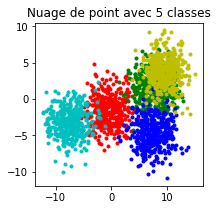

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(3,3))
for i, c in zip(range(0,5), "rgbyc"):
    ax.plot(X[y==i, 0], X[y==i, 1], c + '.', label=str(i))
ax.set_title("Nuage de point avec 5 classes")

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.8

Mettons le jour dans une fonction pour plusieurs modèles :

In [7]:
from time import clock

def evaluate_model(models, X_train, X_test, y_train, y_test):
    res = {}
    for k, v in models.items():
        t1 = clock()
        v.fit(X_train, y_train)
        t2 = clock() - t1
        res[k + "_time_train"] = t2
        t1 = clock()
        score = v.score(X_test, y_test)
        t2 = clock() - t1
        res[k + "_time_test"] = t2
        res[k + "_score"] = score
    return res

from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
models = {'OvO-LR': OneVsOneClassifier(LogisticRegression()),
          'OvR-LR': OneVsRestClassifier(LogisticRegression()),
          'LR':  LogisticRegression()}

res = evaluate_model(models, X_train, X_test, y_train, y_test)
res

{'LR_score': 0.8,
 'LR_time_test': 0.00019950617283950867,
 'LR_time_train': 0.004796839506172837,
 'OvO-LR_score': 0.828,
 'OvO-LR_time_test': 0.001883654320987655,
 'OvO-LR_time_train': 0.017101432098765433,
 'OvR-LR_score': 0.8,
 'OvR-LR_time_test': 0.0004175802469135806,
 'OvR-LR_time_train': 0.011554370370370368}

La stratégie *OneVsOne* a l'air d'être plus performante. La régression logistique implémente la stratégie *OneVsRest*. On ne l'évalue plus.

In [8]:
import pandas

models = {'OvO-LR': OneVsOneClassifier(LogisticRegression()),
          'OvR-LR': LogisticRegression()}

rows = []
for centers in range(2, 51):
    X, y = make_blobs(1000, centers=centers, cluster_std=2.)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    res = evaluate_model(models, X_train, X_test, y_train, y_test)
    res['centers'] = centers
    rows.append(res)

df = pandas.DataFrame(rows)
df

,OvO-LR_score,OvO-LR_time_test,OvO-LR_time_train,OvR-LR_score,OvR-LR_time_test,OvR-LR_time_train,centers
0,0.952,0.000532,0.002063,0.952,0.000269,0.000924,2
1,0.992,0.000544,0.004426,0.984,0.002238,0.001805,3
2,0.916,0.000899,0.007395,0.900,0.000179,0.002021,4
3,0.836,0.001192,0.011177,0.824,0.000256,0.002694,5
4,0.912,0.001561,0.015192,0.888,0.000171,0.002806,6
5,0.672,0.002408,0.020203,0.668,0.000257,0.003714,7
6,0.652,0.002834,0.025439,0.628,0.000218,0.003463,8
7,0.708,0.003260,0.032378,0.652,0.000283,0.004034,9
8,0.676,0.003947,0.041043,0.640,0.000188,0.004158,10
9,0.728,0.006353,0.048126,0.688,0.000274,0.004526,11


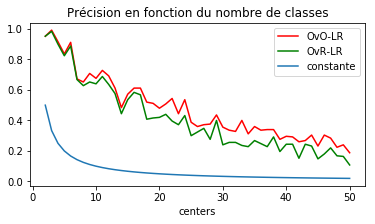

In [9]:
fix, ax = plt.subplots(1, 1, figsize=(6, 3))
for c, col in zip('rgb', [_ for _ in df.columns if '_score' in _]):
    df.plot(x="centers", y=col, label=col.replace("_score", ""), ax=ax, color=c)
x = list(range(2, 51))
ax.plot(x, [1./_ for _ in x], label="constante")
ax.legend()
ax.set_title('Précision en fonction du nombre de classes');

## évolution en fonction du nombre de classes

On pourrait se dire que c'est parce que le nombre d'exemples par classes décroît. Voyons cela.

In [10]:
import pandas

models = {'OvO-LR': OneVsOneClassifier(LogisticRegression()),
          'OvR-LR': OneVsRestClassifier(LogisticRegression())}

rows = []
for centers in range(2, 51):
    X, y = make_blobs(100 * centers, centers=centers, cluster_std=2.)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    res = evaluate_model(models, X_train, X_test, y_train, y_test)
    res['centers'] = centers
    rows.append(res)

df2 = pandas.DataFrame(rows)
df2

,OvO-LR_score,OvO-LR_time_test,OvO-LR_time_train,OvR-LR_score,OvR-LR_time_test,OvR-LR_time_train,centers
0,1.000000,0.000587,0.001734,1.000000,0.001030,0.002107,2
1,0.720000,0.001779,0.006996,0.666667,0.000423,0.006687,3
2,0.890000,0.000717,0.010589,0.900000,0.000289,0.004599,4
3,1.000000,0.001016,0.008864,1.000000,0.000318,0.005234,5
4,0.726667,0.001410,0.011471,0.666667,0.000407,0.006223,6
5,0.765714,0.002008,0.015882,0.754286,0.000393,0.007808,7
6,0.710000,0.002606,0.020889,0.645000,0.000424,0.008969,8
7,0.582222,0.003113,0.030827,0.520000,0.000460,0.011013,9
8,0.792000,0.003928,0.033526,0.776000,0.000491,0.012444,10
9,0.574545,0.004921,0.040922,0.480000,0.000605,0.014100,11


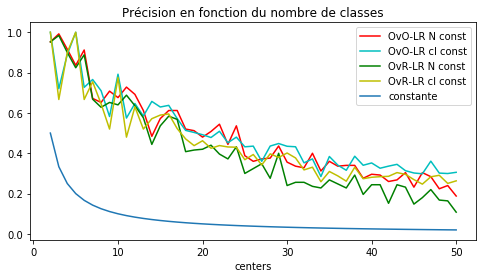

In [11]:
fix, ax = plt.subplots(1, 1, figsize=(8, 4))
for c1, c2, col in zip('rg', 'cy', [_ for _ in df2.columns if '_score' in _]):
    df.plot(x="centers", y=col, label=col.replace("_score", " N const"), ax=ax, color=c1)
    df2.plot(x="centers", y=col, label=col.replace("_score", " cl const"), ax=ax, color=c2)
x = list(range(2, 51))
ax.plot(x, [1./_ for _ in x], label="constante")
ax.legend()
ax.set_title('Précision en fonction du nombre de classes');

## évolution en fonction de la variance

Un peu mieux mais cela décroît toujours. Peut-être que la courbe dépend de la confusion entre les classes ?

In [12]:
import pandas

models = {'OvO-LR': OneVsOneClassifier(LogisticRegression()),
          'OvR-LR': OneVsRestClassifier(LogisticRegression())}

rows = []
for std_ in range(5, 31):
    X, y = make_blobs(1000, centers=40, cluster_std=std_/10.)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    res = evaluate_model(models, X_train, X_test, y_train, y_test)
    res['std'] = std_/10.
    rows.append(res)

df3 = pandas.DataFrame(rows)
df3

,OvO-LR_score,OvO-LR_time_test,OvO-LR_time_train,OvR-LR_score,OvR-LR_time_test,OvR-LR_time_train,std
0,0.656,0.063483,0.539099,0.296,0.001547,0.050513,0.5
1,0.640,0.065259,0.533324,0.276,0.001362,0.051536,0.6
2,0.712,0.070078,0.524669,0.300,0.001441,0.053237,0.7
3,0.528,0.066854,0.567966,0.320,0.001425,0.049879,0.8
4,0.616,0.063002,0.505305,0.248,0.001404,0.048661,0.9
5,0.496,0.066295,0.534065,0.292,0.001411,0.048941,1.0
6,0.496,0.061540,0.512548,0.352,0.001410,0.046235,1.1
7,0.504,0.063630,0.503214,0.304,0.001484,0.047897,1.2
8,0.488,0.076549,0.552105,0.228,0.001436,0.056806,1.3
9,0.408,0.071063,0.602770,0.248,0.001888,0.050014,1.4


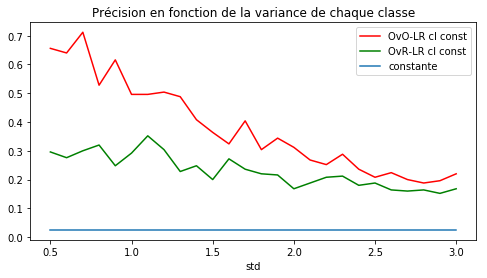

In [13]:
fix, ax = plt.subplots(1, 1, figsize=(8, 4))
for c1, col in zip('rg', [_ for _ in df3.columns if '_score' in _]):
    df3.plot(x="std", y=col, label=col.replace("_score", " cl const"), ax=ax, color=c1)
x = [_/10. for _ in range(5, 31)]
ax.plot(x, [1/40. for _ in x], label="constante")
ax.set_title('Précision en fonction de la variance de chaque classe')
ax.legend();

## évolution en fonction de la dimension

Et en fonction du nombre de dimensions :

In [14]:
import pandas

models = {'OvO-LR': OneVsOneClassifier(LogisticRegression()),
          'OvR-LR': OneVsRestClassifier(LogisticRegression())}

rows = []
for nf in range(2, 11):
    X, y = make_blobs(1000, centers=40, cluster_std=2., n_features=nf)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    res = evaluate_model(models, X_train, X_test, y_train, y_test)
    res['nf'] = nf
    rows.append(res)

df4 = pandas.DataFrame(rows)
df4

,OvO-LR_score,OvO-LR_time_test,OvO-LR_time_train,OvR-LR_score,OvR-LR_time_test,OvR-LR_time_train,nf
0,0.280,0.072415,0.571267,0.188,0.001486,0.054709,2
1,0.552,0.077630,0.585355,0.408,0.002046,0.058775,3
2,0.708,0.084796,0.693822,0.648,0.001385,0.062964,4
3,0.892,0.092499,0.966911,0.840,0.001447,0.079282,5
4,0.960,0.088230,0.840674,0.916,0.001685,0.086147,6
5,0.936,0.091463,0.678690,0.872,0.001480,0.086931,7
6,0.972,0.125336,0.708110,0.952,0.002739,0.176811,8
7,0.992,0.073257,0.776747,0.996,0.001535,0.106343,9
8,0.996,0.071192,0.781009,0.988,0.001511,0.115516,10


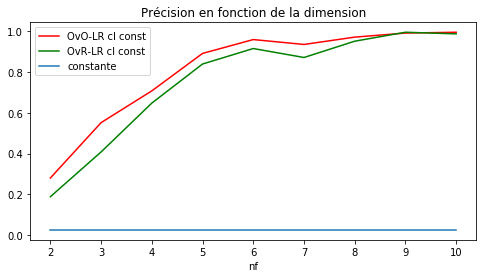

In [15]:
fix, ax = plt.subplots(1, 1, figsize=(8, 4))
for c1, col in zip('rg', [_ for _ in df4.columns if '_score' in _]):
    df4.plot(x="nf", y=col, label=col.replace("_score", " cl const"), ax=ax, color=c1)
x = list(range(2, 11))
ax.plot(x, [1/40. for _ in x], label="constante")
ax.set_title('Précision en fonction de la dimension')
ax.legend();

## retour sur le nombre de classes

In [16]:
import pandas

models = {'OvO-LR': OneVsOneClassifier(LogisticRegression()),
          'OvR-LR': OneVsRestClassifier(LogisticRegression())}

rows = []
for centers in range(10, 151, 25):
    X, y = make_blobs(40 * centers, centers=centers, cluster_std=2.)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    res = evaluate_model(models, X_train, X_test, y_train, y_test)
    res['centers'] = centers
    rows.append(res)

df5 = pandas.DataFrame(rows)
df5

,OvO-LR_score,OvO-LR_time_test,OvO-LR_time_train,OvR-LR_score,OvR-LR_time_test,OvR-LR_time_train,centers
0,0.570000,0.005170,0.038076,0.510000,0.000521,0.010232,10
1,0.360000,0.054092,0.513362,0.288571,0.001338,0.049240,35
2,0.236667,0.192328,1.356538,0.198333,0.002357,0.129873,60
3,0.168235,0.559440,3.123064,0.135294,0.003981,0.296634,85
4,0.156364,1.020811,4.499695,0.110000,0.006338,0.467511,110
5,0.100741,1.469743,6.970833,0.087407,0.005546,0.527650,135


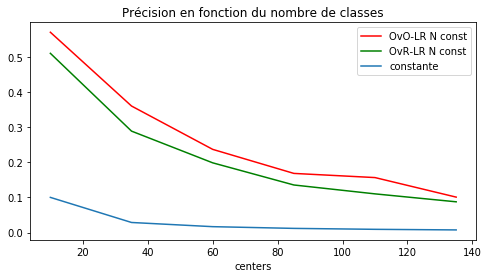

In [17]:
fix, ax = plt.subplots(1, 1, figsize=(8, 4))
for c1, col in zip('rgcy', [_ for _ in df5.columns if '_score' in _]):
    df5.plot(x="centers", y=col, label=col.replace("_score", " N const"), ax=ax, color=c1)
x = df5.centers
ax.plot(x, [1./_ for _ in x], label="constante")
ax.legend()
ax.set_title('Précision en fonction du nombre de classes');

## un dernier jeu sûr

On construit un dernier jeu pour lequel le taux de classification devrait être 100%.

In [18]:
import numpy

def jeu_x_y(ncl, n):
    uni = numpy.random.random(n*2).reshape((n, 2))
    resx = []
    resy = []
    for i in range(ncl):
        resx.append(uni + i * 2)
        resy.append(numpy.ones(n) * i)
    X = numpy.vstack(resx)
    y = numpy.hstack(resy)
    return X, y

X, y = jeu_x_y(4, 100)
X.shape, y.shape

((400, 2), (400,))

Text(0.5,1,'Nuage de point avec 5 classes')

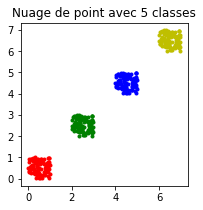

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
for i, c in zip(range(0,5), "rgbyc"):
    ax.plot(X[y==i, 0], X[y==i, 1], c + '.', label=str(i))
ax.set_title("Nuage de point avec 5 classes")

In [20]:
from sklearn.tree import DecisionTreeClassifier

models = {'OvO-LR': OneVsOneClassifier(LogisticRegression()),
          'OvR-LR': OneVsRestClassifier(LogisticRegression()),
          'DT': DecisionTreeClassifier()}

rows = []
for centers in range(2, 21):
    X, y = jeu_x_y(centers, 10)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    res = evaluate_model(models, X_train, X_test, y_train, y_test)
    res['centers'] = centers
    rows.append(res)

df5 = pandas.DataFrame(rows)
df5

,DT_score,DT_time_test,DT_time_train,OvO-LR_score,OvO-LR_time_test,OvO-LR_time_train,OvR-LR_score,OvR-LR_time_test,OvR-LR_time_train,centers
0,1.0,0.000599,0.000572,1.000000,0.000695,0.001878,1.000000,0.000776,0.002392,2
1,1.0,0.000213,0.000522,0.875000,0.000773,0.003008,0.625000,0.000434,0.004627,3
2,1.0,0.000299,0.000359,0.300000,0.000853,0.004449,0.300000,0.000407,0.003547,4
3,1.0,0.000176,0.000251,0.538462,0.001852,0.015344,0.538462,0.000335,0.007200,5
4,1.0,0.000164,0.000252,0.533333,0.001340,0.011736,0.533333,0.000418,0.004642,6
5,1.0,0.000199,0.000274,0.500000,0.001828,0.014497,0.500000,0.000373,0.005886,7
6,1.0,0.000167,0.000259,0.350000,0.002699,0.018743,0.300000,0.000503,0.006413,8
7,1.0,0.000168,0.000274,0.173913,0.002729,0.024221,0.217391,0.000443,0.007108,9
8,1.0,0.000184,0.000321,0.320000,0.003607,0.028823,0.320000,0.000500,0.007797,10
9,1.0,0.000173,0.000303,0.250000,0.004306,0.036563,0.178571,0.000636,0.008546,11


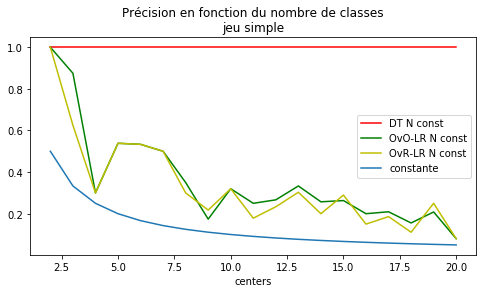

In [21]:
fix, ax = plt.subplots(1, 1, figsize=(8, 4))
for c1, col in zip('rgycbp', [_ for _ in df5.columns if '_score' in _]):
    df5.plot(x="centers", y=col, label=col.replace("_score", " N const"), ax=ax, color=c1)
x = df5.centers
ax.plot(x, [1./_ for _ in x], label="constante")
ax.legend()
ax.set_title('Précision en fonction du nombre de classes\njeu simple');

La régression logistique n'est pas le meilleur modèle lorsque le nombre de classes est élevé et la dimension de l'espace de variables faible.